In [1]:
# import libraries
import os as os
import pandas as pd
import numpy as np
import geopandas as gp
from matplotlib import pyplot as plt
from shapely.geometry import point
import matplotlib_map_utils as mapu

/home/vu-main/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
# Set the working directory
path = "/media/vu-main/PRIME II/Miniproject/FinalData"
os.chdir(path)

# Load the CSV data into a pandas DataFrame
df = pd.read_csv("/media/vu-main/PRIME II/Miniproject/FinalData/TX23.csv")

/tmp/ipykernel_264855/3099118384.py:6: DtypeWarning: Columns (5,75,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/media/vu-main/PRIME II/Miniproject/FinalData/TX23.csv")


In [6]:
df.head(1) #show the first 6 values

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
0,48,0000000L2015318,1,6,4,0,0,0,375,0,...,Y,7,200,2035,NaN,Y,68,G,7,169.84


In [84]:
def dms_to_dd(dms):
    dms = str(dms)  # Ensure dms is a string
    if len(dms) <= 8:
        degrees = int(dms[:2])
        minutes = int(dms[2:4])
        seconds = int(dms[4:6]) / 100
    else:
        degrees = int(dms[:3])
        minutes = int(dms[3:5])
        seconds = int(dms[5:7]) / 100
    dd = degrees + minutes / 60 + seconds / 3600
    return dd


In [85]:
#Using the lambda function to Column LAT16 AND LONG017 to Convert DMS to DD for latitude and longitude
df['LAT_016_DD'] = df['LAT_016'].apply(lambda x: dms_to_dd(str(x)))
df['LONG_017_DD'] = df['LONG_017'].apply(lambda x: -dms_to_dd(str(x)))

In [86]:
# Create a new column for the geometric point
df['geometry'] = df.apply(lambda row: f"POINT ({row['LONG_017_DD']} {row['LAT_016_DD']})", axis=1)

In [88]:
# Check to Confirm new column is created
df.head(1)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,LAT_016_DD,LONG_017_DD,geometry
0,48,0000000L2015318,1,6,4,0,0,0,375,0,...,2035,NaN,Y,68,G,7,169.84,35.300158,-101.933353,POINT (-101.93335277777778 35.30015833333333)


In [89]:
# Create a GeoDataFrame for the points
gdf_points = gp.GeoDataFrame(df, geometry=gp.points_from_xy(df['LONG_017_DD'], df['LAT_016_DD']))

In [90]:
# Set the CRS to NAD83 (EPSG:4269)
gdf_points.set_crs(epsg=4269, inplace=True)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,LAT_016_DD,LONG_017_DD,geometry
0,48,0000000L2015318,1,6,4,0,0,0,375,0,...,2035,NaN,Y,68,G,7,169.84,35.300158,-101.933353,POINT (-101.93335 35.30016)
1,48,000021521-00101,1,6,0,0,0,2,71,0,...,2042,NaN,Y,63,F,6,150.72,29.600058,-94.450078,POINT (-94.45008 29.60006)
2,48,000021521-00181,1,6,0,0,0,2,71,0,...,2042,NaN,Y,63,G,7,74.40,29.600081,-94.416803,POINT (-94.4168 29.60008)
3,48,000021521-TMP20,1,6,1,0,0,2,71,0,...,2042,NaN,Y,63,G,7,91.91,29.600142,-94.533444,POINT (-94.53344 29.60014)
4,48,000021525-00012,1,6,0,0,0,2,245,0,...,2042,NaN,Y,63,P,4,204.30,29.683425,-94.066800,POINT (-94.0668 29.68342)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56308,48,DAPTRABLI018560,1,8,0,0,0,24,141,26664,...,2043,NaN,Y,74,G,7,3542.06,31.816814,-106.300094,POINT (-106.30009 31.81681)
56309,48,NCA1,1,6,0,0,0,0,113,19000,...,2041,NaN,Y,56,F,6,341.28,32.716672,-96.933367,POINT (-96.93337 32.71667)
56310,48,NCA2,1,6,0,0,0,0,113,19000,...,2041,NaN,Y,56,F,5,141.68,32.700136,-96.933342,POINT (-96.93334 32.70014)
56311,48,NCA3,1,6,0,0,0,0,113,19000,...,2041,NaN,Y,56,F,6,364.81,32.700125,-96.933369,POINT (-96.93337 32.70012)


In [91]:
# Save as a GeoPackage GPKG file
gdf_points.to_file("TX23POINTS.gpkg", driver='GPKG')

In [92]:
fname1 = "TX23POINTS.gpkg"  # Name of the bridges surveyed in 2023
fname2 = "CONUS.gpkg"  # Name of Texas gpkg file

# Read the Geopackage file using geopandas
TX23POINTS = gp.read_file(fname1)  # Read the CSV file
CONUS = gp.read_file(fname2)  # Content of Texas maps 
TX23POINTS.head(2)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,LAT_016_DD,LONG_017_DD,geometry
0,48,0000000L2015318,1,6,4,0,0,0,375,0,...,2035,NaN,Y,68,G,7,169.84,35.300158,-101.933353,POINT (-101.93335 35.30016)
1,48,000021521-00101,1,6,0,0,0,2,71,0,...,2042,NaN,Y,63,F,6,150.72,29.600058,-94.450078,POINT (-94.45008 29.60006)


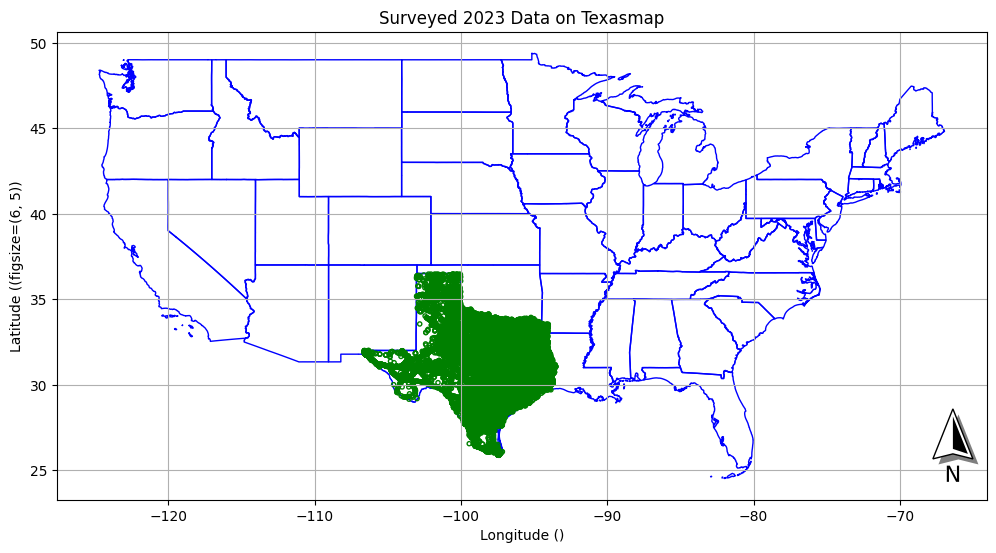

In [96]:
# Visualize the overlay result (you can customise this based on your needs)
fig = plt.figure(figsize=(12, 18))
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
CONUS.plot(ax=ax1, edgecolor='blue', facecolor = 'none', markersize=1)
TX23POINTS.plot (facecolor='none', edgecolor='green', ax=ax1, marker='.') #ax=ax1 - overlaping axis. 
mapu.north_arrow.north_arrow(a, marker='.'x=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude ()')
ax1.set_ylabel('Latitude ((figsize=(6, 5))')
plt.grid()
plt.title ("Surveyed 2023 Data on Texasmap")
plt.show()

MAP PLOTTED

LOGISTIC REGRESSION

In [101]:
# Import Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns

ModuleNotFoundError: No module named 'sklearn'

In [104]:
#Read datas
df= pd.read_csv("/media/vu-main/PRIME II/Miniproject/FinalData/TX23.csv")

/tmp/ipykernel_264855/2190834878.py:2: DtypeWarning: Columns (5,75,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/media/vu-main/PRIME II/Miniproject/FinalData/TX23.csv")


In [105]:
df.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
0,48,0000000L2015318,1,6,4,0,0,0,375,0,...,Y,7,200,2035,NaN,Y,68,G,7,169.84
1,48,000021521-00101,1,6,0,0,0,2,71,0,...,Y,8,1,2042,NaN,Y,63,F,6,150.72
2,48,000021521-00181,1,6,0,0,0,2,71,0,...,Y,8,1,2042,NaN,Y,63,G,7,74.40
3,48,000021521-TMP20,1,6,1,0,0,2,71,0,...,Y,8,150,2042,NaN,Y,63,G,7,91.91
4,48,000021525-00012,1,6,0,0,0,2,245,0,...,Y,8,120,2042,NaN,Y,63,P,4,204.30


In [106]:
features = ['Deck_COND_058','CHANNEL_COND_061', 'CULVERT_COND_062']

In [85]:
# Check for NaN values in each column
N_values_count = df.isna().sum()

print("Count of N values in each column:")
print(N_values_count)


Count of N values in each column:
STATE_CODE_001          0
STRUCTURE_NUMBER_008    0
RECORD_TYPE_005A        0
ROUTE_PREFIX_005B       0
SERVICE_LEVEL_005C      0
                       ..
LOWEST_RATING           0
DECK_AREA               0
LAT_016_DD              0
LONG_017_DD             0
geometry                0
Length: 126, dtype: int64


In [95]:
# Replace 'N' with NaN for easier handling
df = df.replace('N', pd.NA)

In [102]:
# Check for 'N' values in each column
n_values_count = df.isna().sum()

print("Count of 'N' values in each column:")
print(n_values_count)

Count of 'N' values in each column:
STATE_CODE_001          0
STRUCTURE_NUMBER_008    0
RECORD_TYPE_005A        0
ROUTE_PREFIX_005B       0
SERVICE_LEVEL_005C      0
                       ..
LOWEST_RATING           0
DECK_AREA               0
LAT_016_DD              0
LONG_017_DD             0
geometry                0
Length: 126, dtype: int64


In [106]:
print(df.head())
type(df)
print(len(df))
print(len(df))

   STATE_CODE_001 STRUCTURE_NUMBER_008  RECORD_TYPE_005A  ROUTE_PREFIX_005B  \
0              48      0000000L2015318                 1                  6   
1              48      000021521-00101                 1                  6   
2              48      000021521-00181                 1                  6   
3              48      000021521-TMP20                 1                  6   
4              48      000021525-00012                 1                  6   

   SERVICE_LEVEL_005C ROUTE_NUMBER_005D  DIRECTION_005E  HIGHWAY_DISTRICT_002  \
0                   4                 0               0                     0   
1                   0                 0               0                     2   
2                   0                 0               0                     2   
3                   1                 0               0                     2   
4                   0                 0               0                     2   

   COUNTY_CODE_003  PLACE_CODE_004  ..